In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:

# Load dataset
df = pd.read_csv('amazonreviews.tsv', sep='\t')


In [17]:

# Check for null values
df.dropna(inplace=True)
df = df[df['review'].str.strip() != '']


In [18]:

# Convert sentiment labels to numerical values
df['label'] = df['label'].map({'pos': 1, 'neg': 0})


In [19]:

# Split data
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:

# Text vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [21]:

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log = log_reg.predict(X_test_tfidf)


In [22]:

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_test_tfidf)


In [23]:

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


In [24]:

# Evaluate models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_knn, "KNN Classifier")



Evaluation for Logistic Regression:
Accuracy: 0.866
Precision: 0.866948257655755
Recall: 0.8525441329179647
F1 Score: 0.8596858638743455
Confusion Matrix:
 [[911 126]
 [142 821]]

Evaluation for KNN Classifier:
Accuracy: 0.738
Precision: 0.7246673490276356
Recall: 0.735202492211838
F1 Score: 0.7298969072164948
Confusion Matrix:
 [[768 269]
 [255 708]]


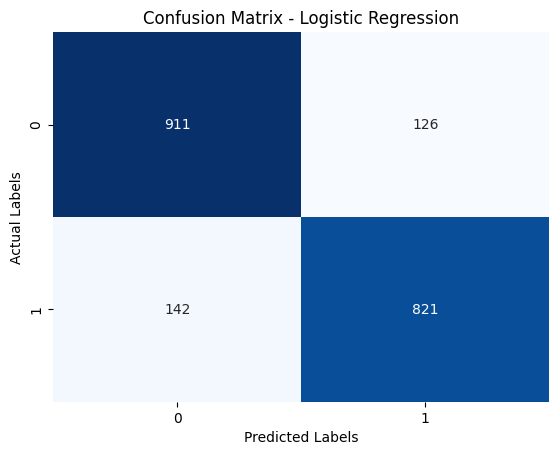

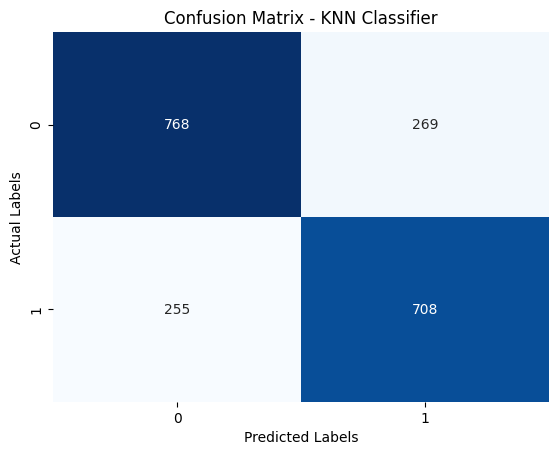

In [25]:
# Instruction 3: Create confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_knn, "KNN Classifier")


In [26]:

# Compare with Vader
vader = SentimentIntensityAnalyzer()
def vader_analysis(text):
    score = vader.polarity_scores(text)['compound']
    return "pos" if score >= 0 else "neg"


In [27]:

# Test with random samples
test_samples = ["I love this product!", "This is the worst experience ever.", "It's okay, not great but not bad either."]
for sample in test_samples:
    print(f"\nText: {sample}")
    print("Vader Sentiment:", vader_analysis(sample))
    print("Logistic Regression Prediction:", log_reg.predict(vectorizer.transform([sample]))[0])
    print("KNN Prediction:", knn.predict(vectorizer.transform([sample]))[0])



Text: I love this product!
Vader Sentiment: pos
Logistic Regression Prediction: 1
KNN Prediction: 1

Text: This is the worst experience ever.
Vader Sentiment: neg
Logistic Regression Prediction: 0
KNN Prediction: 0

Text: It's okay, not great but not bad either.
Vader Sentiment: pos
Logistic Regression Prediction: 0
KNN Prediction: 0
